Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

no display found. Using non-interactive Agg backend


Data Collection & Analysis

In [ ]:
  # loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# first 5 rows of the dataframe
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# getting some informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [ ]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
# statistical Measures of the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


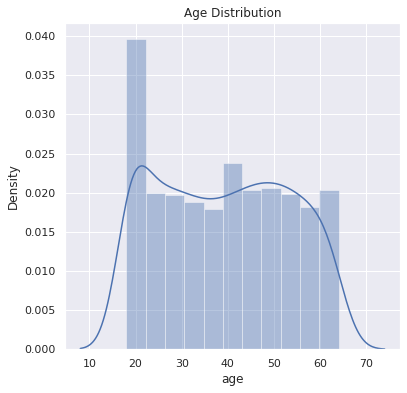

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

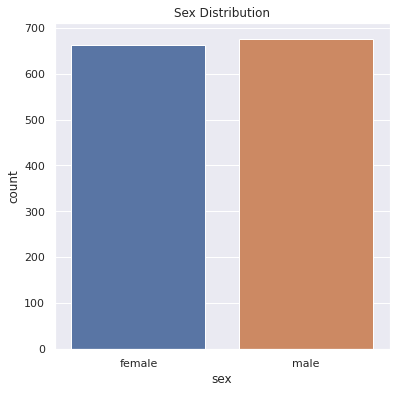

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


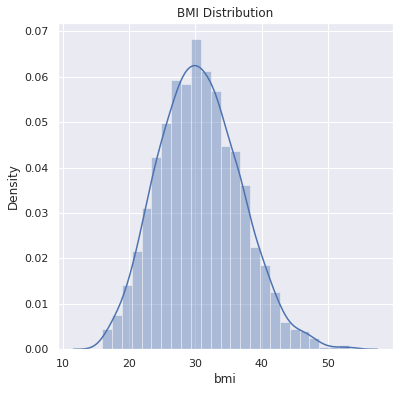

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

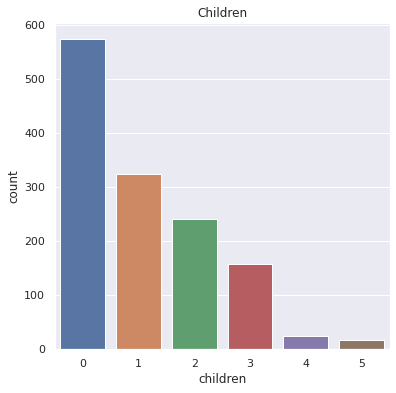

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

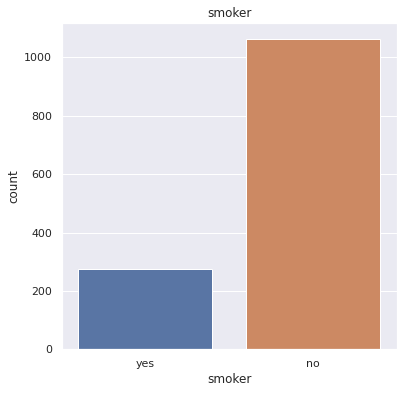

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

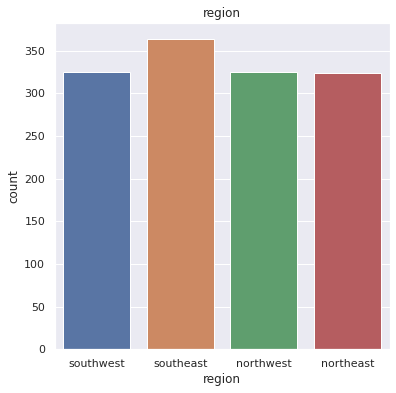

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


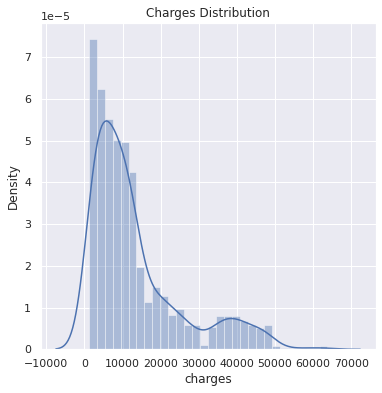

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

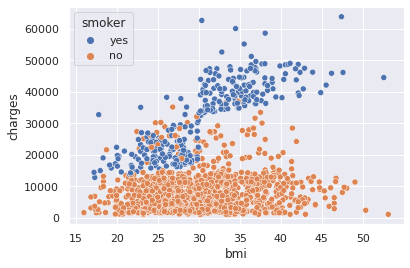

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data)

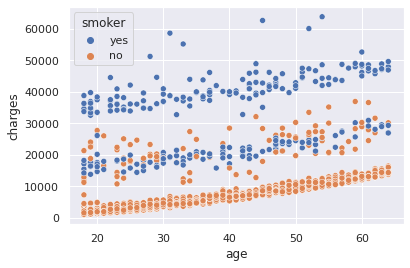

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = data)



Person who smoke have to pay more cost for insurance, obese person who smoke have the highest medical cost.


Data Pre-Processing

Encoding the categorical features

In [ ]:
# encoding sex column
data.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Correlation Analysis

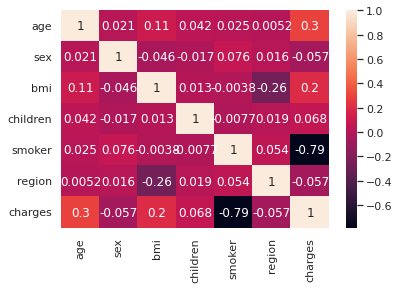

In [ ]:
ax = sns.heatmap(data.corr(), annot=True)

Since region and bmi are negatively correlated, we can remove either bmi or region. But intitutively we understand that bmi is important, so we remove region.


We can see that age, bmi and smoker are highly correlated with the target variable which is charge, hence they are important factors. Whereas region and sex can be omitted because they are not correlated with the target variable.

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
svm = SVR()
svm.fit(X_train,Y_train)
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

ValueError: ignored

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':Y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [ ]:
df1

,Actual,Lr,svm,rf,gr
17,2395.17155,1520.592422,9195.367327,4809.748250,3997.205442
1091,11286.53870,11570.592018,9380.383114,11260.414722,12159.050017
273,9617.66245,10082.438499,9349.482569,14581.874359,11134.165033
270,1719.43630,2246.217543,9182.203618,2288.557134,3009.267748
874,8891.13950,7881.283620,9307.373685,9736.219606,10056.388319
...,...,...,...,...,...
232,1727.78500,-1669.890650,9190.275192,1939.179937,7495.479060
323,11566.30055,15722.419522,9391.639091,15921.683329,13566.571354
1337,29141.36030,36968.055645,9408.339335,28719.968654,28319.448971
1066,8978.18510,12987.364848,9341.251773,9744.894615,10065.341206


Metrics Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(Y_test,y_pred1)
score2 = metrics.r2_score(Y_test,y_pred2)
score3 = metrics.r2_score(Y_test,y_pred3)
score4 = metrics.r2_score(Y_test,y_pred4)

In [ ]:
print(score1,score2,score3,score4)

0.7447273869684077 -0.08038132828590361 0.8393854973478817 0.8679678385271311


In [ ]:
s1 = metrics.mean_absolute_error(Y_test,y_pred1)
s2 = metrics.mean_absolute_error(Y_test,y_pred2)
s3 = metrics.mean_absolute_error(Y_test,y_pred3)
s4 = metrics.mean_absolute_error(Y_test,y_pred4)

In [ ]:
print(s1,s2,s3,s4)

4267.21382673073 8467.075338758827 2703.046331739404 2386.662982464832


Prediction using new data

In [ ]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [ ]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [ ]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  11867.223556535353


In [ ]:
new_pred = svm.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  9291.153280425893


In [ ]:
new_pred = rf.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  15760.46289009999


In [ ]:
new_pred = lr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  13582.480230574294


In [ ]:
gr = GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [ ]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  10565.77906159951


In [ ]:
import joblib

In [ ]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [ ]:
model = joblib.load('model_joblib_gr')

In [ ]:
model.predict(df)

array([10565.7790616])

In [ ]:
import joblib

In [ ]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [ ]:
model = joblib.load('model_joblib_gr')

In [ ]:
model.predict(df)

array([10565.7790616])

In [ ]:
# Insurance cost prediction GUI
from tkinter import *

In [ ]:
import joblib

In [ ]:
def show_entry():

    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())

    model = joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master,text="Insurance Cost").grid(row=14)
    Label(master,text=result).grid(row=15)



master=Tk()
master.title("   Insurance Cost Prediction   ")
label=Label(master,text=' Insurance Cost Prediction ',bg="yellow", fg="blue").grid(row=0,columnspan=1)
Label(master,text = "").grid(row=1)
Label(master,text = "Enter your age",bg="lightblue", fg="blue").grid(row=2)
Label(master,text = "").grid(row=3)
Label(master,text = "Male or Female [1/0]",bg="lightblue", fg="blue").grid(row=4)
Label(master,text = "").grid(row=5)
Label(master,text = "Enter your BMI value",bg="lightblue", fg="blue").grid(row=6)
Label(master,text = "").grid(row=7)
Label(master,text = "Enter number of children",bg="lightblue", fg="blue").grid(row=8)
Label(master,text = "").grid(row=9)
Label(master,text = "Smoker Yes/No [1/0]",bg="lightblue", fg="blue").grid(row=10)
Label(master,text = "").grid(row=11)
Label(master,text = "Region [1-4]",bg="lightblue", fg="blue").grid(row=12)
Label(master,text = "").grid(row=13)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)

e1.grid(row=2,column=4)
e2.grid(row=4,column=4)
e3.grid(row=6,column=4)
e4.grid(row=8,column=4)
e5.grid(row=10,column=4)
e6.grid(row=12,column=4)

Button(master,text="Predict",bg="pink", fg="blue",command=show_entry).grid()


mainloop()


TclError: ignored